<a href="https://colab.research.google.com/github/hamrioui2019/Machine-learning-/blob/master/ml_tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k plus proches voisins - k nearest neighbours**

On abbregera k-plus proches voisins avec k-ppv

## Exercice 1 
A tracer sur papier.

On a les quatre points suivants:

|Nom| coordonnées |
|---| --- |
| A | (1,1)|
| B | (1,3)|
| C | (-1,2) |
| D | (-2,0) |

 Tracer la frontière de décision pour le 1 - plus proche voisin


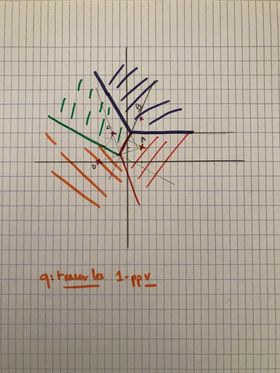

## Exercice 2

On a les données ci-dessous avec 9 observations, les classes sont données dans le vecteur $Y$ et les attributs sont donnés dans le vecteur $X$.

1. Générez le graphique des données.
2. Ecrivez une fonction kppv(X, Y, k, obs) qui prend les données $X$ et leur classe $Y$, la valeur de $k$ et un point et qui retourne la prédiction du k-ppv.
Pour simplifier, on supposera qu'il y a seulement deux attributs et que la distance est la distance euclidienne.

notez que numpy possède une fonction pour trier (voir exemple ci-dessous)

In [ ]:
import numpy as np
X = np.array([[-4, 0], [-3,1], [-3, 0], [-3,-1], [-0.9, 0], [1,0], [2.2,1], [2.2,0], [2.2, -1]])
Y = np.array([1,1,1,1,2,2,2,2])

v = np.array([6,3,4,2,1,5])
print("données avant le trie:")
# retourne les données triées
print(v)
print("données après le trie")
print(np.sort(v))
sigma = np.argsort(v)
print("permuation sigma=",sigma)
print("l'élément le plus petit est celui qui a l'index", sigma[0], "dans le vecteur original")
print("l'élément le plus grand est celui qui a l'index", sigma[len(v)-1], "dans le vecteur original")
v=np.array([1, 2, 3, 2, 1, 2, 3, 1, 3, 2, 1])
val, count = np.unique(v, return_counts=True)
print("éléments unique de v:", val,  " nombre d'occurrences: ", count)



données avant le trie:
[6 3 4 2 1 5]
données après le trie
[1 2 3 4 5 6]
permuation sigma= [4 3 1 2 5 0]
l'élément le plus petit est celui qui a l'index 4 dans le vecteur original
l'élément le plus grand est celui qui a l'index 0 dans le vecteur original
éléments unique de v: [1 2 3]  nombre d'occurrences:  [4 4 3]


avec matplotlib:

('La classe prédite pour', 1, 'voisins est', 1)
('La classe prédite pour', 1, 'voisins est', 1)
('La classe prédite pour', 1, 'voisins est', 1)
('La classe prédite pour', 1, 'voisins est', 1)
('La classe prédite pour', 1, 'voisins est', 1)
('La classe prédite pour', 1, 'voisins est', 2)
('La classe prédite pour', 1, 'voisins est', 2)
('La classe prédite pour', 1, 'voisins est', 2)
('La classe prédite pour', 1, 'voisins est', 2)



('La classe prédite pour', 3, 'voisins est', 1)
('La classe prédite pour', 3, 'voisins est', 1)
('La classe prédite pour', 3, 'voisins est', 1)
('La classe prédite pour', 3, 'voisins est', 1)
('La classe prédite pour', 3, 'voisins est', 1)
('La classe prédite pour', 3, 'voisins est', 2)
('La classe prédite pour', 3, 'voisins est', 2)
('La classe prédite pour', 3, 'voisins est', 2)
('La classe prédite pour', 3, 'voisins est', 2)

pour le point (0,0)	 ('La classe prédite pour', 3, 'voisins est', 2)


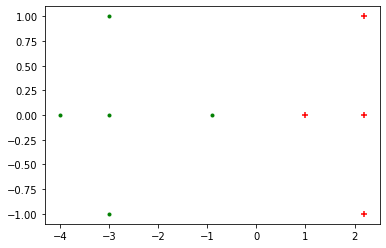

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.spatial import distance
X = np.array([[-4, 0], [-3,1], [-3, 0], [-3,-1], [-0.9, 0], [1,0], [2.2,1], [2.2,0], [2.2, -1]])
Y = np.array([1,1,1,1,1,2,2,2,2])

#Graphique des données
#je peut soit afficher ainsi avec la librairie seaborn 

#sbn.relplot(X[:,0],X[:,1],Y,palette=['b','r'])
#ou encore utilisé la librairie matplotlib
print("avec matplotlib:\n")
plt.figure()
plt.scatter(X[0:5].T[0],X[0:5].T[1],marker='.',c='green')
plt.scatter(X[5:9].T[0],X[5:9].T[1],marker='+',c='red')

#Q: KNN

#on calcule la distance euclédienne entre deux point p1 et p2 ou encore utiliser 
#la distance euclédienne prédéfinite en python avec la librérie spatial
def dist(p1,p2):
  return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def kppv(X,Y,k,obs):
  distances=np.zeros(len(X))
  for i in range(len(X)):
    distances[i]=distance.euclidean(X[i], obs)
  sortdist = np.argsort(distances)
  val=[]
  for i in range(k):
    val.append(Y[sortdist[i]])
  v,count=np.unique(val,return_counts=True)
  #print(val)
  #print(count)
  c=np.argsort(count)
  return("La classe prédite pour",k,"voisins est", v[c[len(c)-1]])

#Q3:
for x in X:
 print(kppv(X,Y,1,x))
print("\n\n")
for x in X:
  print(kppv(X,Y,3,x))

print("\npour le point (0,0)\t", kppv(X,Y,3,(0,0)))









3. Prenez chaque observation individuellement et traitez la comme une nouvelle observation. Pour chaque observation, quelle serait la classification donnée par 1-ppv et 3-ppv
4. Quelle est la classification prédite pour le point (0,0) avec 1-ppv et 3-ppv?

## Exercice 3

### Données Iris

Ci-dessous, on charge pour vous la base de données Iris. On va travailler pour le moment avec les attributs des colonnes 2 et 3, mais on pourra tester d'autres paires d'attributs par la suite.

In [ ]:
from sklearn.datasets import load_iris
Xcomplet, y = load_iris(return_X_y=True) 
print("Nom des classes: ", np.unique(y))
print("Nombre d'observations dans chacune des classes:", np.bincount(y))
print("Il y a ", Xcomplet.size, " observations avec ", Xcomplet[0].size, " attributs")
X=Xcomplet[:,[2,3]]
# on travaille ici avec les colonnes 2 et 3, on pourra changer cela.
print("Il y a ", len(Xcomplet), " observations avec ", len(Xcomplet[0]), " attributs")

Nom des classes:  [0 1 2]
Nombre d'observations dans chacune des classes: [50 50 50]
Il y a  600  observations avec  4  attributs
Il y a  150  observations avec  4  attributs


On met en place l'algorithme des $k$-plus proches voisins implémenté dans la librairie scikit-learn. Notez qu'ici, on initialise avec $k=5$ et la distance est la distance euclidienne. Notez que pour le moment, l'algorithme n'a pas été "entrainé" puisqu'on n'a pas encore spécifié de données.

En fait, on a créé une instance de la classe KNeighborsClassifier, qui est une sous classe de la classe qui représente les problèmes de classification. Cette classe possède deux méthodes: fit(X, y) et predict(T).

1. Tracez le graphique montrant tous les points de la base. Utilisez une couleur différente et un symbole différent pour représenter les points de chacune des classes.
2. Utilisez la méthode fit pour "entrainer" l'algorithme, et utilisez la méthode prédict pour tester quelques observations "à la main". N'hésitez pas à consulter la documentation de scikit-learn si vous avez besoin.

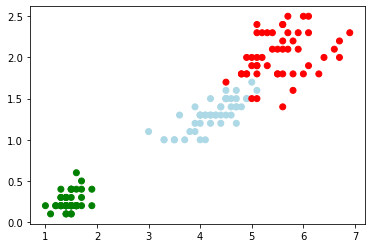

In [ ]:
#Question 1:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
colormap = np.array(['green', 'lightblue', 'red'])
plt.scatter(X.T[0], X.T[1], c = colormap[y])

On vous donne ci-dessous le code d'une méthode pour générer le graphique des régions de décisions. La stratégie est de demander à l'algorithme de classification la classification pour tous les points d'une grille et de générer les régions avec les prédictions.

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#classifier, on va mettre n'importe quelle classe qui hérite de la classe classifier
#dans notre tp ici plus bas, on mettera kppv
#designant une instance de KNeighborsClassifier
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl, 
                    edgecolor='black')

3. Utilisez la fonction plot_decision_regions codée ci-dessous pour visualiser la surface de décision.
4. Changez la valeur de $k$ et observez les changements de la surface de décision.
5. On peut aussi travailler avec d'autres distance. Vous trouverez les distances disponibles sur [ce lien](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html). Utilisez la distance de manhattan et observez les changements de la surface de décisions avec plusieurs valeurs de $k$.

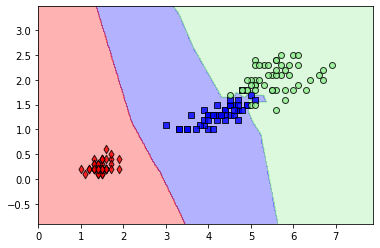




Test différents voisins: 



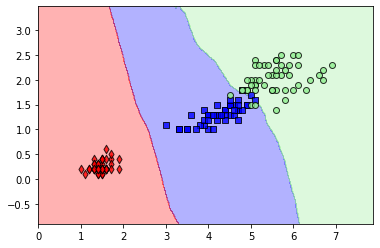


 on va utiliser la distance de manhaattan poour dessiner les régions



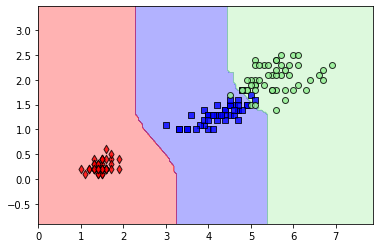

In [ ]:
# Question 2
from sklearn.neighbors import KNeighborsClassifier
kppv = KNeighborsClassifier(n_neighbors=1,  metric='euclidean')

#on va d'abord ajustée l'instance du classifieur au modèle; c'est-à-dire qu'il doit apprendre du modèle on utilise la methode fit
kppv.fit(X, y)
#désormais on peut prédire de nouvelles valeurs.
kppv.predict(X)
#on utilise mnt plot_decision_region pour répondre a la Q3
plot_decision_regions(X, y, kppv, resolution=0.02)
plt.show()
print("\n\n")

#Q4: on teste avec diff valeur de k , n_neighbors (voisins)
print("Test différents voisins: \n")
kppv2 = KNeighborsClassifier(n_neighbors=10,  metric='euclidean')
kppv2.fit(X, y)
kppv2.predict(X)
plot_decision_regions(X, y, kppv2, resolution=0.02)
plt.show()

#Q5: on utilise la distance de manhattan au lieu de l'euclédienne
print("\n on va utiliser la distance de manhaattan poour dessiner les régions\n")
kppv3 = KNeighborsClassifier(n_neighbors=20,  metric='manhattan')
kppv3.fit(X, y)
kppv3.predict(X)
plot_decision_regions(X, y, kppv3, resolution=0.02)
plt.show()
